In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


Load Data

In [57]:
housing = pd.read_csv(r"E:\omar\Material\AI l3 S1\Machine Learning\Project\ML-Capstone-Project\data\data_1\housing.csv")

print(housing.head())
print(housing.info())
print(housing.isna().sum())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  
0         322         126         8.3252              452600  
1        2401        1138         8.3014              358500  
2         496         177         7.2574              352100  
3         558         219         5.6431              341300  
4         565         259         3.8462              342200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------   

In [30]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())
print(housing.isna().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


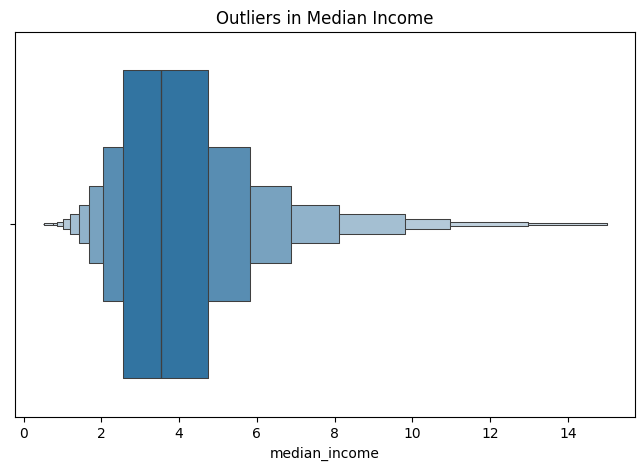

In [31]:
plt.figure(figsize=(8,5))
sns.boxenplot(x=housing['median_income'])
plt.title('Outliers in Median Income')
plt.show()

In [50]:
xh = housing.drop('median_house_value', axis=1)
yh = housing['median_house_value']

xh_train, xh_test, yh_train, yh_test = train_test_split(xh, yh, test_size=0.2,random_state=42)

scaler = StandardScaler()
xh_train_scaled = scaler.fit_transform(xh_train)
Xh_test_scaled = scaler.transform(xh_test)

xh_scaled_cluster = scaler.fit_transform(xh)
xh_scaled_cluster = pd.DataFrame(xh_scaled_cluster, columns=xh.columns)


print(f"X_train_scaled shape: {xh_train_scaled.shape}")
print(f"y_train shape: {yh_train.shape}")
print(f"y_train shape: {xh_scaled_cluster.shape}")

X_train_scaled shape: (16512, 8)
y_train shape: (16512,)
y_train shape: (20640, 8)


In [33]:
# heart = pd.read_csv(r"data\data _2\raw_merged_heart_dataset.csv")

# print(heart.head())
# print(heart.info())
# print(housing.isna().sum())

Clustring Model

2.Choose best k

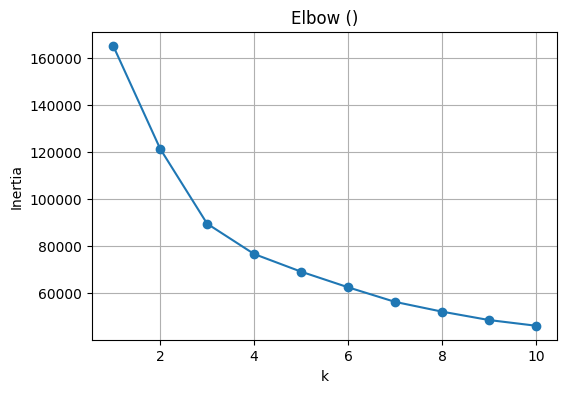

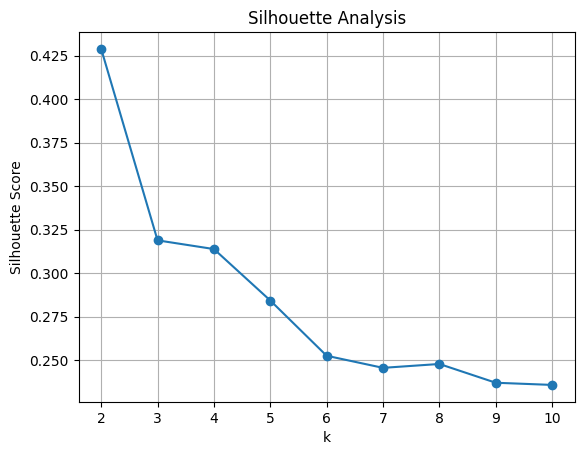

In [49]:
inertias = []
sil_scores = []
ks = range(1,11)
for k in ks:
    km = KMeans(n_clusters=k,random_state=42,n_init=10)
    labels = km.fit_predict(xh_scaled_cluster)
    inertias.append(km.inertia_)
    if k>1:
        sil_scores.append(silhouette_score(xh_scaled_cluster, labels))

#visuals the Elbow Method 
plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.xlabel("k"); plt.ylabel("Inertia")
plt.title("Elbow ()")
plt.grid(True)
plt.show()
plt.plot(range(2,11), sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.grid(True)
plt.show()

3.Train K-Means with k=3

In [51]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(xh_scaled_cluster)
xh_scaled_cluster["Cluster"] = clusters

score = silhouette_score(xh_scaled_cluster.drop("Cluster",axis=1), clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.31890967277846843


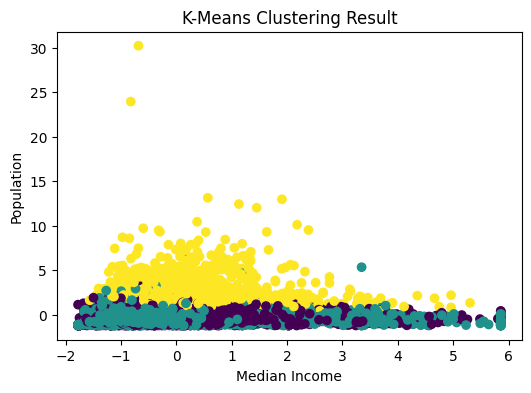

In [52]:
plt.figure(figsize=(6,4))
plt.scatter(
    xh_scaled_cluster["median_income"],
    xh_scaled_cluster["population"],
    c=xh_scaled_cluster["Cluster"]
)
plt.xlabel("Median Income")
plt.ylabel("Population")
plt.title("K-Means Clustering Result")
plt.show()

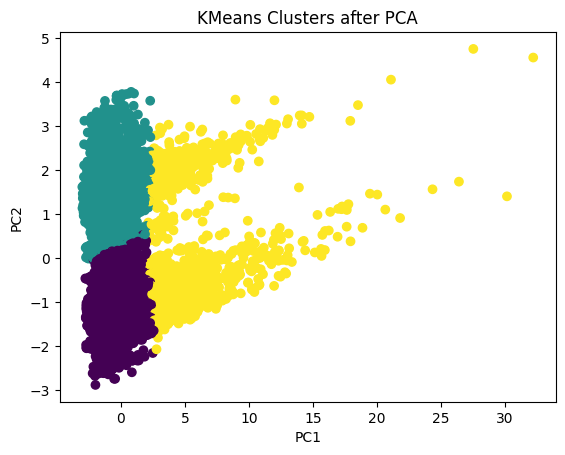

In [58]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(xh_scaled_cluster.drop("Cluster", axis=1))

plt.scatter(X_pca[:,0], X_pca[:,1],
            c=xh_scaled_cluster["Cluster"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters after PCA")
plt.show()